In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import bokeh
import lightkurve as lk
from lightkurve import search_targetpixelfile
from lightkurve import search_lightcurve
import astropy.units as u

Following along with http://docs.lightkurve.org/quickstart.html.

In [1]:
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile('KIC 8462852',quarter=16).download()

<AxesSubplot:title={'center':'Target ID: 8462852, Cadence: 66714'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

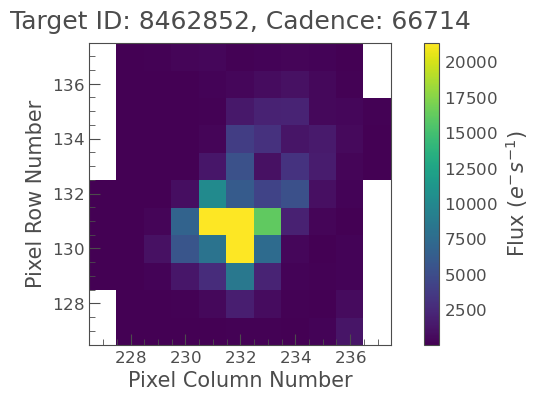

In [2]:
pixelfile.plot(frame=1)

In [6]:
lc = pixelfile.to_lightcurve(aperture_mask='all')

In [8]:
lc.time

<Time object: scale='tdb' format='bkjd' value=[1472.11777934 1472.13821223 1472.15864492 ... 1557.91762194 1557.9380561
 1557.95849016]>

In [11]:
lc.flux

<Quantity [258645.03, 258660.05, 258690.08, ..., 258948.84, 258884.66,
           258865.6 ] electron / s>

In [12]:
lc.flux.size

3540

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

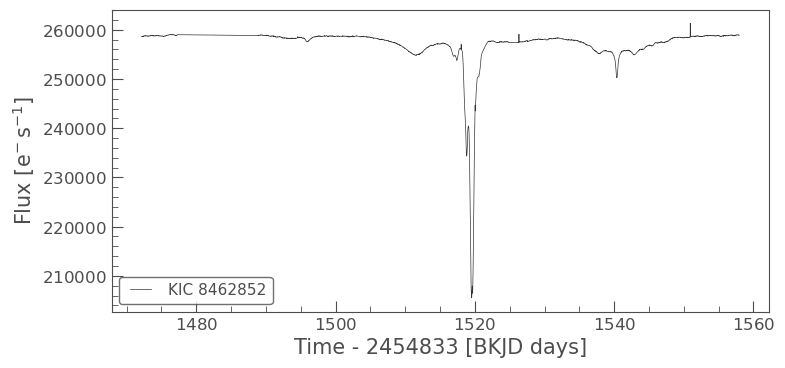

In [13]:
lc.plot()

<AxesSubplot:title={'center':'Target ID: 8462852, Cadence: 61887'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

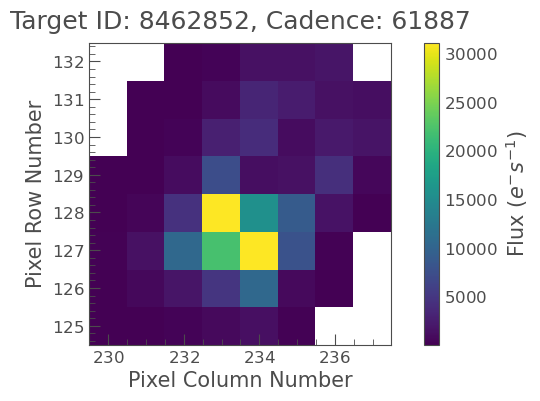

In [5]:
# Just as a test to see if this works
pixelfile2 = search_targetpixelfile('KIC 8462852',quarter=15).download()
pixelfile2.plot(frame=1)

Now following http://docs.lightkurve.org/tutorials/1-getting-started/what-are-lightcurve-objects.html.

In [3]:
# First we open a Target Pixel File from MAST, this one is already cached from our previous tutorial!
# tpf = targetpixelfile
tpf = search_targetpixelfile('KIC 6922244', author="Kepler", cadence="long", quarter=4).download()

# Then we convert the target pixel file into a light curve using the pipeline-defined aperture mask.
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

In [4]:
lc.meta

{'APERTURE_MASK': array([[False, False, False, False, False],
        [False, False,  True,  True, False],
        [False, False,  True,  True, False],
        [False,  True,  True,  True, False],
        [False, False, False,  True, False]]),
 'TARGETID': 6922244,
 'LABEL': 'KIC 6922244',
 'CHANNEL': 31,
 'CAMPAIGN': None,
 'QUARTER': 4,
 'MISSION': 'Kepler',
 'RA': 281.28812,
 'DEC': 42.45108}

In [5]:
lc.meta['DEC']

42.45108

In [6]:
print(lc.time)
print(lc.flux)

[352.37632485 352.39675805 352.43762445 ... 442.16263546 442.18306983
 442.2035041 ]
[43689.15  43698.08  43694.105 ... 43155.8   43148.465 43151.562] electron / s


In [7]:
lc.estimate_cdpp()

<Quantity 75.29876612 ppm>

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

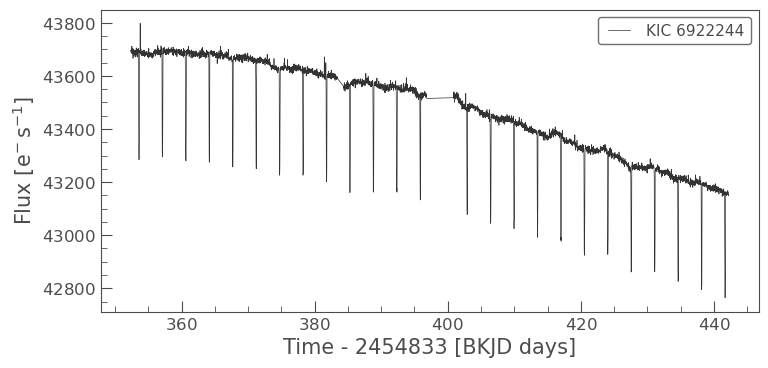

In [8]:
lc.plot()

In [9]:
# Without specifying window_length parameter
flat_lc = lc.flatten()

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

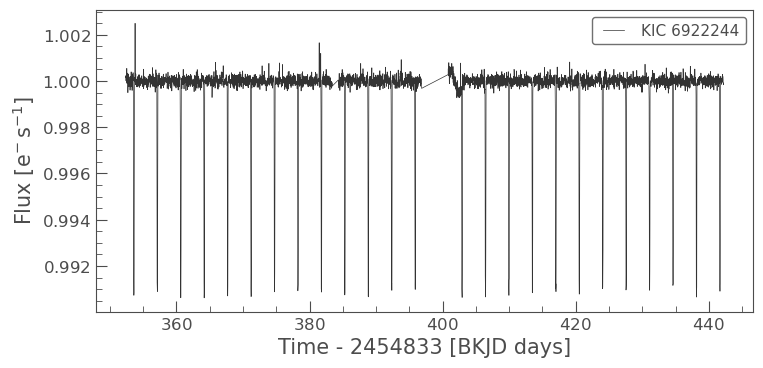

In [10]:
flat_lc.plot()

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

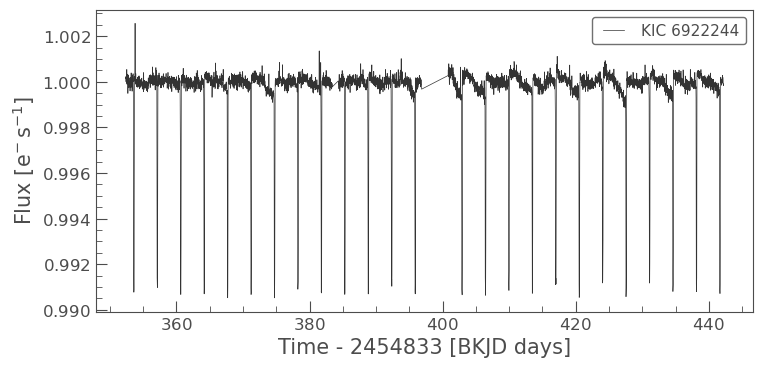

In [11]:
# With specifying window_length parameter - not sure what this does
flat_lc = lc.flatten(window_length=401)
flat_lc.plot()

<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power [$\\mathrm{\\frac{e^{-}}{s}}$]'>

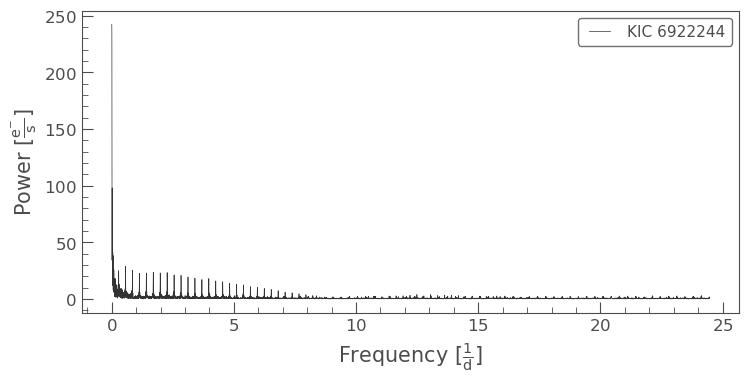

In [12]:
# This is just me messing around
periodogram = lc.to_periodogram()
periodogram.plot()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

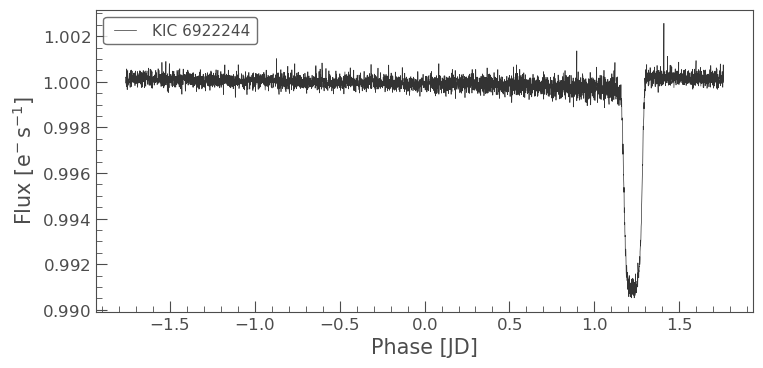

In [13]:
folded_lc = flat_lc.fold(period=3.5225)
folded_lc.plot() # Planet transit?

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

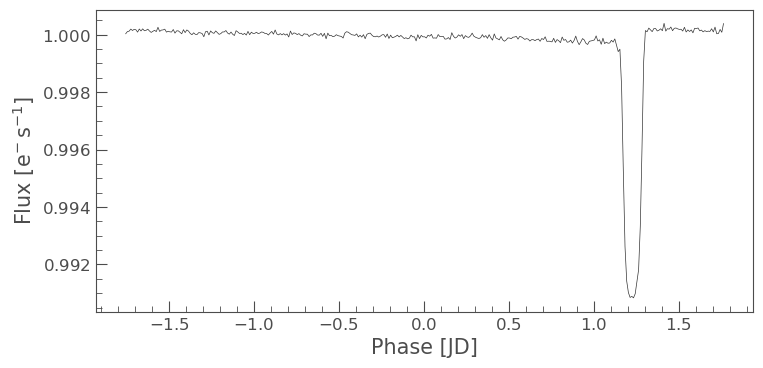

In [14]:
# Here I think we're literally just adjusting the binwidth to make it look a little cleaner. Wonder what it was
# before?
binned_lc = folded_lc.bin(time_bin_size=0.01)
binned_lc.plot()

In [15]:
folded_lc

time,flux,flux_err,time_original,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,,pix,pix,,
object,float64,float64,object,float64,float64,int32,int32
-1.7607652497707749,0.9999544861255559,0.0001518780270722382,361.18305960058206,683.1623201394972,190.593827518647,12345,0
-1.7596862286992836,1.0002131379995456,0.00015278217061620727,424.58913862165355,683.0268164350913,190.75061133795865,15448,8192
-1.7596236315945861,1.0002029597551227,0.00015227974297581567,378.79670121875824,683.1265680288259,190.63313183257878,13207,0
-1.7582466666976688,1.0001523775474106,0.00015241252519280178,396.41057818365516,683.0850892481336,190.67908523830084,14069,0
-1.7578207538253627,0.999908850688648,0.00015291824475959913,442.20350409652747,683.0024686391082,190.7814194325506,16310,0
-1.75664843446546,0.9998112669659381,0.00015264924105751188,414.02467641588737,683.0456752289788,190.7262175001675,14931,0
-1.7562501005275408,0.9999467730275762,0.00015207338400940868,368.2325747498253,683.1480229561141,190.6109141828849,12690,0
-1.7550140938561527,0.9998130912166856,0.00015238162182493748,385.8463107564967,683.1126841771145,190.64931913145318,13552,0


In [16]:
# Looks like it has 4116 elements for about 3.5 days --> bin width of about 0.0008 days?
# Now how many elements are in binned_lc?
binned_lc

time,flux,flux_err,time_bin_start,time_bin_size,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,,s,pix,pix,,
object,float64,float64,object,float64,float64,float64,int32,int32
-1.755765249770775,1.000031944830879,4.228113462830933e-05,-1.7607652497707749,864.0000000000008,683.0868533115855,190.6801850760805,14095,630
-1.745765249770775,1.0001082022723273,4.401732173158319e-05,-1.750765249770775,864.0000000000008,683.0814686792922,190.68633290157308,14213,682
-1.735765249770775,1.000122713002774,4.5942428821703544e-05,-1.7407652497707748,864.0000000000008,683.0993648704193,190.66523512938664,13788,0
-1.725765249770775,1.0001943513816534,4.5973540104655046e-05,-1.730765249770775,863.999999999996,683.0833949937734,190.68434243425187,14180,0
-1.715765249770775,1.000146062811819,4.2275446499812435e-05,-1.720765249770775,864.0000000000008,683.091081151018,190.6747235696045,13965,630
-1.705765249770775,1.0001860433036436,4.597290542807444e-05,-1.710765249770775,864.0000000000008,683.0833746500707,190.6844370132306,14181,13
-1.695765249770775,1.0001712925667097,4.595486640686369e-05,-1.700765249770775,864.0000000000008,683.0924403935884,190.67312914476085,13931,1489
-1.685765249770775,1.0000890751472478,4.228951360459406e-05,-1.690765249770775,864.0000000000008,683.0832749228713,190.68433018676595,14178,631


In [17]:
# This makes sense - 353 entries in this light curve, and that's a little less than 10% of 4116, while 
# 0.0008 is a little less than 10% of 0.01

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

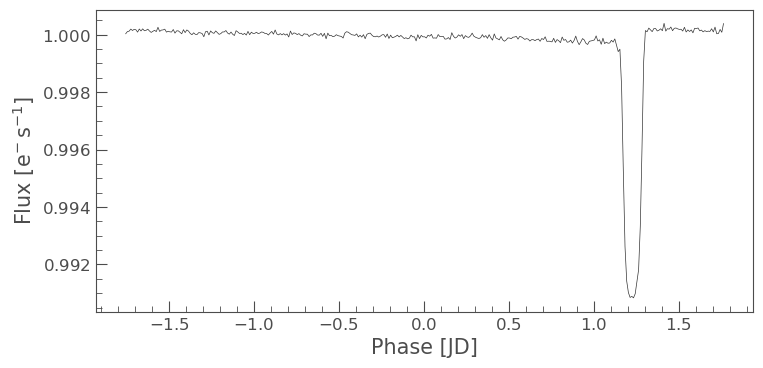

In [18]:
# I like that we can also do it all in one line!
lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(time_bin_size=0.01).plot()

Next tutorial (on TPFs): http://docs.lightkurve.org/tutorials/1-getting-started/what-are-targetpixelfile-objects.html.

Two different classes of target pixel files: KeplerTargetPixelFile and TESSTargetPixelFile. 

In [2]:
import lightkurve as lk
tpf = lk.read("https://archive.stsci.edu/pub/kepler/target_pixel_files/0069/006922244/kplr006922244-2010078095331_lpd-targ.fits.gz")
# Or alternatively can use the search_targetpixelfile() function: search by target name, ID, or coordinates

In [21]:
tpf.meta['MISSION']

'Kepler'

In [22]:
tpf.time

<Time object: scale='tdb' format='bkjd' value=[352.37632485 352.39675805 352.43762445 ... 442.16263546 442.18306983
 442.2035041 ]>

In [23]:
tpf.time.iso # Clear human-readable timestamps in TDB (can convert to UTC w/ astropy...)

array(['2009-12-19 21:01:54.467', '2009-12-19 21:31:19.895',
       '2009-12-19 22:30:10.752', ..., '2010-03-19 15:54:11.704',
       '2010-03-19 16:23:37.233', '2010-03-19 16:53:02.754'], dtype='<U23')

In [24]:
# ...like so:
tpf.time.utc.iso

array(['2009-12-19 21:00:48.284', '2009-12-19 21:30:13.712',
       '2009-12-19 22:29:04.569', ..., '2010-03-19 15:53:05.518',
       '2010-03-19 16:22:31.048', '2010-03-19 16:51:56.568'], dtype='<U23')

<AxesSubplot:title={'center':'Target ID: 6922244, Cadence: 11914'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

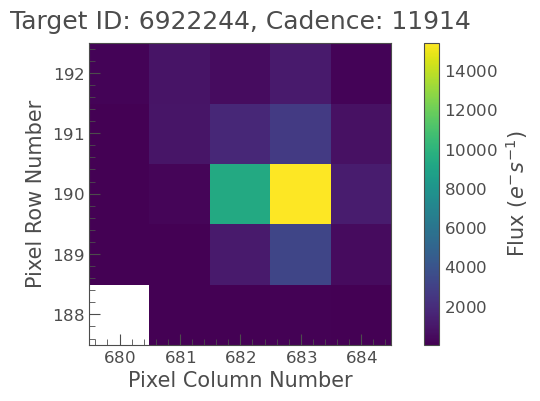

In [25]:
tpf.plot(frame=0)

In [ ]:
# Can also access the flux values directly pixel-by-pixel with: 
tpf.flux[0] # [0] for frame [0] i.e., this cadence

http://docs.lightkurve.org/tutorials/1-getting-started/what-are-periodogram-objects.html

KIC 10264202 is a known eclipsing binary - let's see if we can figure out its period.

In [3]:
from lightkurve import search_lightcurve
lc = search_lightcurve('KIC 10264202', author="Kepler", quarter=10, cadence="long").download().remove_nans()

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

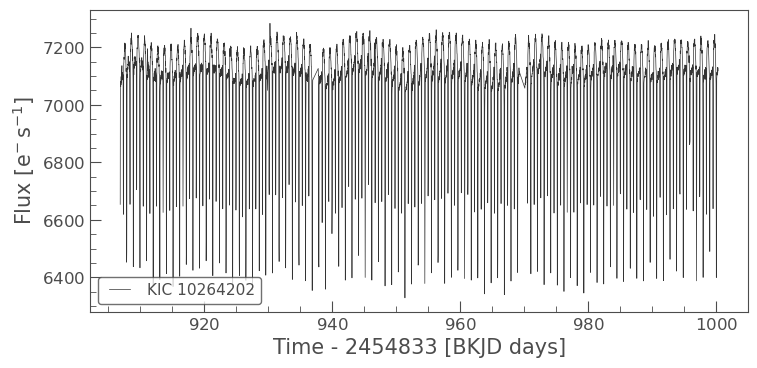

In [29]:
lc.plot()

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

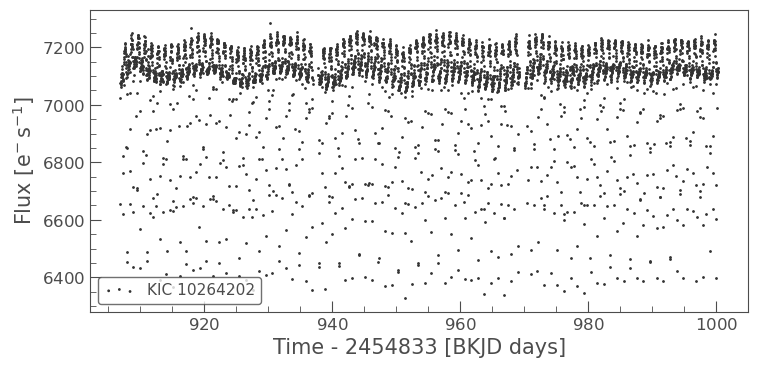

In [30]:
# That's pretty ugly - but we can use a scatter plot instead
lc.scatter()

<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power [$\\mathrm{\\frac{e^{-}}{s}}$]'>

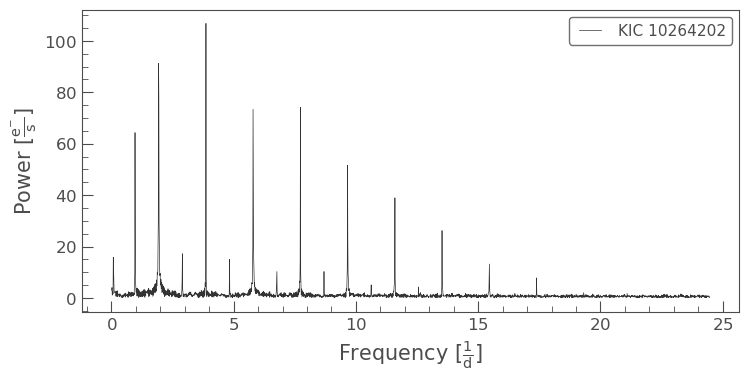

In [31]:
pg = lc.to_periodogram(oversample_factor=1)
pg.plot()

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='Power [$\\mathrm{\\frac{e^{-}}{s}}$]'>

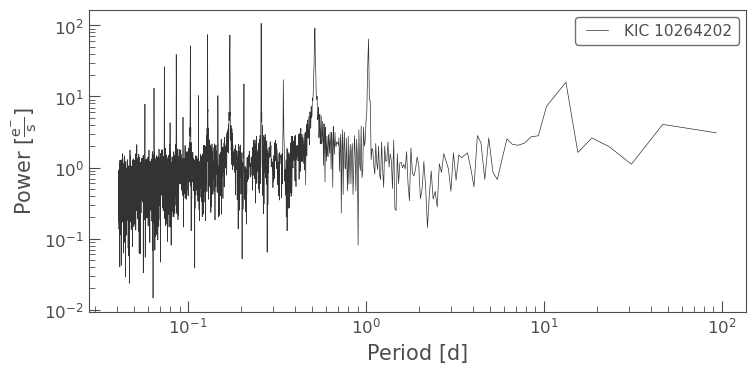

In [32]:
pg.plot(view='period', scale='log')

In [33]:
# Can look at the data in the above plot with 
print(pg.period)
print(pg.power)

[9.34019490e+01 4.67009745e+01 3.11339830e+01 ... 4.09119356e-02
 4.08940232e-02 4.08761265e-02] d
[3.08123446 4.04910021 1.11686323 ... 0.38587616 0.17210997 0.42668004] electron / s


In [34]:
# Get period of the highest peak in the plot above
pg.period_at_max_power

<Quantity 0.25873116 d>

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

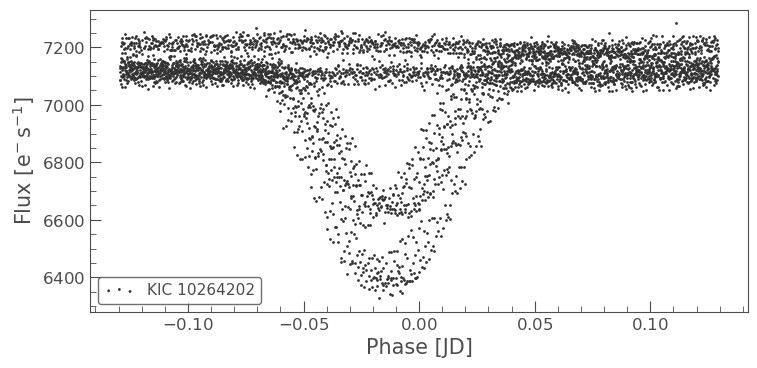

In [36]:
# Now fold along that period
lc.fold(period=pg.period_at_max_power).scatter()

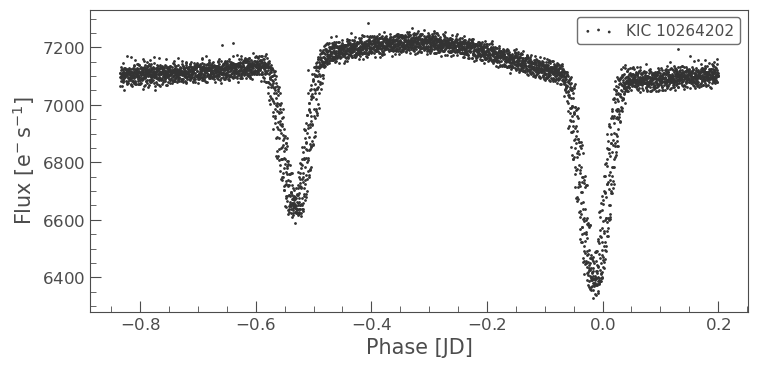

In [37]:
# Here we see the eclipses aren't lining up properly, indicating that this is probably a harmonic of the true 
# period. This is common for EBs with deep secondary eclipses. Try quadruple the period:
lc.fold(period=4*pg.period_at_max_power, wrap_phase=0.2).scatter();

In [4]:
# Much better, but not perfect. We can try to get a more precise period by increasing the number of points in the
# periodogram with the oversample_factor argument
import astropy.units as u
pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
pg.period_at_max_power
# Looks like we're actually giving it a specific window of time to oversample in to really hone in on the period

<Quantity 1.03509717 d>

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

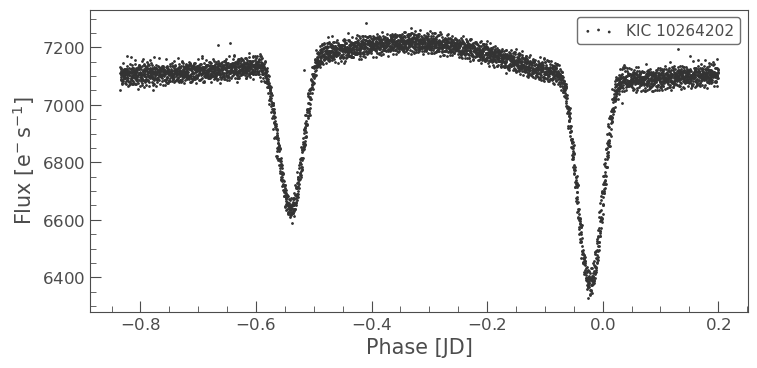

In [39]:
lc.fold(period=pg.period_at_max_power, wrap_phase=0.2).scatter()

http://docs.lightkurve.org/tutorials/1-getting-started/searching-for-data-products.html

Searching and downloading Kepler, K2, and TESS data

In [5]:
import matplotlib.pyplot as plt

In [41]:
# Kepler/K2/TESS target pixel files and light curves both are stored on MAST
search_result = lk.search_lightcurve('KIC 3733346', author='Kepler')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr003733346,0.0
1,Kepler Quarter 02,2009,Kepler,1800,kplr003733346,0.0
2,Kepler Quarter 03,2009,Kepler,1800,kplr003733346,0.0
3,Kepler Quarter 04,2010,Kepler,1800,kplr003733346,0.0
4,Kepler Quarter 05,2010,Kepler,1800,kplr003733346,0.0
5,Kepler Quarter 06,2010,Kepler,1800,kplr003733346,0.0
6,Kepler Quarter 07,2010,Kepler,1800,kplr003733346,0.0
7,Kepler Quarter 08,2011,Kepler,1800,kplr003733346,0.0
8,Kepler Quarter 09,2011,Kepler,1800,kplr003733346,0.0


In [42]:
# You can see it returns results for every quarter (but it's the same object)
search_result[1]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 02,2009,Kepler,1800,kplr003733346,0.0


In [43]:
search_result.table

dataproduct_type,calib_level,obs_collection,obs_id,target_name,s_ra,s_dec,t_min,t_max,t_exptime,wavelength_region,filters,em_min,em_max,target_classification,obs_title,t_obs_release,instrument_name,proposal_pi,proposal_id,proposal_type,project,sequence_number,provenance_name,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,intentType,obsid,objID,exptime,distance,obsID,obs_collection_products,dataproduct_type_products,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project_products,prvversion,proposal_id_products,productFilename,size,parent_obsid,dataRights_products,calib_level_products,author,mission,#,year,sort_order
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,s,arcsec,,,,,,,,,,,,,,,,,,,,,,,
str10,int64,str6,str36,str13,float64,float64,float64,float64,float64,str7,str6,float64,float64,str1,str22,float64,str6,str15,str7,str6,str6,int64,str6,str112,str109,str108,str6,bool,float64,str7,str6,str6,float64,float64,str6,str6,str10,str60,str1,str119,str9,str28,str8,str1,str6,str1,str7,str44,int64,str6,str6,int64,str6,object,int64,int64,int64
timeseries,2,Kepler,kplr003733346_lc_Q011111111111111111,kplr003733346,287.11345099999994,38.81283,54964.01041666667,56423.50069444445,1800.0,OPTICAL,KEPLER,418400000000.0,905000000000.0,--,Overlap of EX and STKL,nan,Kepler,William Borucki,EX_STKL,Kepler,Kepler,--,Kepler,POLYGON ICRS 287.11059926 38.81505200 287.11059944 38.81060800 287.11630256 38.81060800 287.11630274 38.81505200,http://archive.stsci.edu/missions/kepler/previews/0037/003733346/kplr003733346-2013098041711_llc_bw_large.png,http://archive.stsci.edu/missions/kepler/lightcurves/0037/003733346/kplr003733346_lc_Q011111111111111111.tar,PUBLIC,--,5885.0,science,488521,715399,1800,0.0,488521,Kepler,timeseries,Lightcurve Long Cadence (CLC) - Q1,C,http://archive.stsci.edu/missions/kepler/lightcurves/0037/003733346/kplr003733346-2009166043257_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX_STKL,kplr003733346-2009166043257_llc.fits,192960,488521,PUBLIC,2,Kepler,Kepler Quarter 01,0,2009,1
timeseries,2,Kepler,kplr003733346_lc_Q011111111111111111,kplr003733346,287.11345099999994,38.81283,54964.01041666667,56423.50069444445,1800.0,OPTICAL,KEPLER,418400000000.0,905000000000.0,--,Overlap of EX and STKL,nan,Kepler,William Borucki,EX_STKL,Kepler,Kepler,--,Kepler,POLYGON ICRS 287.11059926 38.81505200 287.11059944 38.81060800 287.11630256 38.81060800 287.11630274 38.81505200,http://archive.stsci.edu/missions/kepler/previews/0037/003733346/kplr003733346-2013098041711_llc_bw_large.png,http://archive.stsci.edu/missions/kepler/lightcurves/0037/003733346/kplr003733346_lc_Q011111111111111111.tar,PUBLIC,--,5885.0,science,488521,715399,1800,0.0,488521,Kepler,timeseries,Lightcurve Long Cadence (CLC) - Q2,C,http://archive.stsci.edu/missions/kepler/lightcurves/0037/003733346/kplr003733346-2009259160929_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX_STKL,kplr003733346-2009259160929_llc.fits,466560,488521,PUBLIC,2,Kepler,Kepler Quarter 02,1,2009,1
timeseries,2,Kepler,kplr003733346_lc_Q011111111111111111,kplr003733346,287.11345099999994,38.81283,54964.01041666667,56423.50069444445,1800.0,OPTICAL,KEPLER,418400000000.0,905000000000.0,--,Overlap of EX and STKL,nan,Kepler,William Borucki,EX_STKL,Kepler,Kepler,--,Kepler,POLYGON ICRS 287.11059926 38.81505200 287.11059944 38.81060800 287.11630256 38.81060800 287.11630274 38.81505200,http://archive.stsci.edu/missions/kepler/previews/0037/003733346/kplr003733346-2013098041711_llc_bw_large.png,http://archive.stsci.edu/missions/kepler/lightcurves/0037/003733346/kplr003733346_lc_Q011111111111111111.tar,PUBLIC,--,5885.0,science,488521,715399,1800,0.0,488521,Kepler,timeseries,Lightcurve Long Cadence (CLC) - Q3,C,http://archive.stsci.edu/missions/kepler/lightcurves/0037/003733346/kplr003733346-2009350155506_llc.fits,SCIENCE,Minimum Recommended Products,LLC,--,Kepler,--,EX_STKL,kplr003733346-2009350155506_llc.fits,466560,488521,PUBLIC,2,Kepl

In [44]:
import numpy as np
quarter2_index = np.where(search_result.table['mission'] == 'Kepler Quarter 02')[0]
search_result[quarter2_index]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 02,2009,Kepler,1800,kplr003733346,0.0


In [45]:
# We can also do something similar to what we just did (narrowing down Kepler data based on the mission and the 
# quarter in which it was observed) with TESS data - we can narrow down TESS data by SECTOR. Pretty useful!
# Can actually just include the sector criteria in the initial search_lightcurve() query 
# But since you can only query either one target at a time or focusing in on a given region of sky and I don’t 
# think you can query by variable type, this might not actually be as useful as I thought

In [46]:
search_result_q2 = lk.search_lightcurve('KIC 3733346', author='Kepler', quarter=2)
search_result_q2

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 02,2009,Kepler,1800,kplr003733346,0.0


In [47]:
# Download a light curve with .download()
lc = search_result_q2.download()
lc

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
169.7659418421681,9.2319516e+04,9.2697735e+00,0,3.263322e-03,781.81123,786.73051,2977,8.9092305e+04,8.8779488e+00,2.0773477e+03,7.0835429e-01,9.2319516e+04,9.2697735e+00,0,nan,nan,nan,nan,781.81123,1.2057812e-04,786.73051,1.4581889e-04,1.0092091e-01,-1.9298431e-01
169.7863760557957,8.9214008e+04,9.1563263e+00,0,3.263836e-03,781.80745,786.73005,2978,8.6126133e+04,8.7672691e+00,2.0793108e+03,7.0831001e-01,8.9214008e+04,9.1563263e+00,0,nan,nan,nan,nan,781.80745,1.2411721e-04,786.73005,1.5003627e-04,1.0036582e-01,-1.9279599e-01
169.80681006918894,8.5608195e+04,9.0206089e+00,0,3.264349e-03,781.80376,786.72918,2979,8.2681344e+04,8.6362791e+00,2.0772085e+03,7.0797533e-01,8.5608195e+04,9.0206089e+00,0,nan,nan,nan,nan,781.80376,1.2850568e-04,786.72918,1.5526263e-04,1.0042009e-01,-1.9289577e-01
169.8272442823436,8.3063625e+04,8.9255180e+00,0,3.264862e-03,781.80081,786.72913,2980,8.0246992e+04,8.5434341e+00,2.0767546e+03,7.0811391e-01,8.3063625e+04,8.9255180e+00,0,nan,nan,nan,nan,781.80081,1.3182692e-04,786.72913,1.5920549e-04,1.0021163e-01,-1.9266903e-01
169.84767829527118,8.4244992e+04,8.9700022e+00,0,3.265375e-03,781.80242,786.72905,2981,8.1373969e+04,8.5879698e+00,2.0805510e+03,7.0775980e-01,8.4244992e+04,8.9700022e+00,0,nan,nan,nan,nan,781.80242,1.3028238e-04,786.72905,1.5737538e-04,1.0010726e-01,-1.9241102e-01
169.86811250773462,9.7360805e+04,9.4567146e+00,0,3.265888e-03,781.81441,786.73210,2982,9.3887734e+04,9.0560179e+00,2.0782170e+03,7.0836788e-01,9.7360805e+04,9.4567146e+00,0,nan,nan,nan,nan,781.81441,1.1529749e-04,786.73210,1.3958653e-04,9.8970458e-02,-1.9224431e-01
169.88854651995644,1.2825345e+05,1.0503614e+01,0,3.266400e-03,781.83651,786.73500,2983,1.2337022e+05,1.0063412e+01,2.0774846e+03,7.0743954e-01,1.2825345e+05,1.0503614e+01,0,nan,nan,nan,nan,781.83651,9.1639682e-05,786.73500,1.1152634e-04,9.9608414e-02,-1.9224758e-01
169.90898063195345,1.5187158e+05,1.1233888e+01,0,3.266912e-03,781.84701,786.73606,2984,1.4590969e+05,1.0766508e+01,2.0792261e+03,7.0833290e-01,1.5187158e+05,1.1233888e+01,0,nan,nan,nan,nan,781.84701,7.9801415e-05,786.73606,9.7487238e-05,9.8825477e-02,-1.9200189e-01


<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

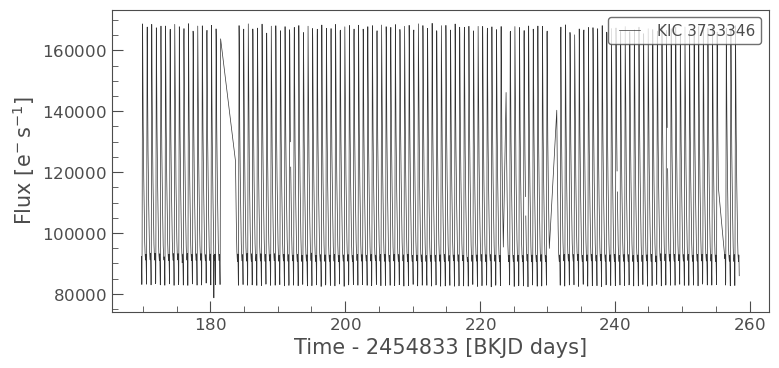

In [48]:
lc.plot()

In [49]:
# Can also download a collection of light curves
# There's actually a special class called LightCurveCollection which holds multiple LightCurve objects
lc_collection = search_result[:5].download_all()
lc_collection

LightCurveCollection of 5 objects:
    0: <KeplerLightCurve LABEL="KIC 3733346" QUARTER=1 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    1: <KeplerLightCurve LABEL="KIC 3733346" QUARTER=2 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    2: <KeplerLightCurve LABEL="KIC 3733346" QUARTER=3 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    3: <KeplerLightCurve LABEL="KIC 3733346" QUARTER=4 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    4: <KeplerLightCurve LABEL="KIC 3733346" QUARTER=5 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

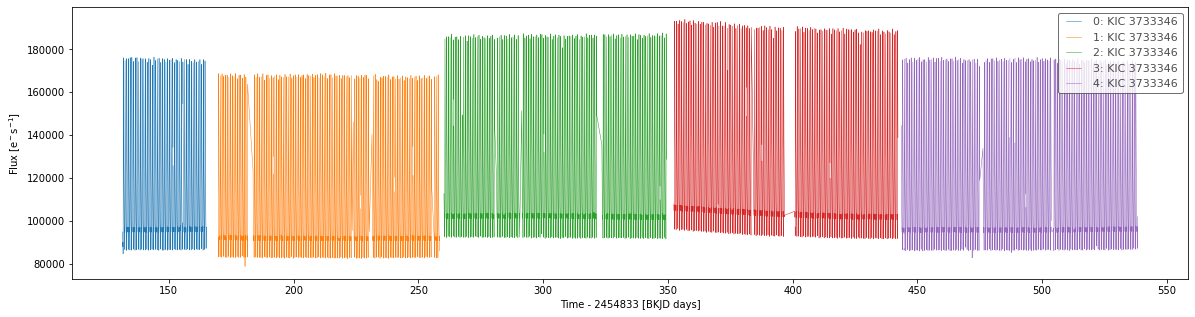

In [50]:
# Create a larger figure for clarity
fig, ax = plt.subplots(figsize=(20,5))
# Plot the light curve collection
lc_collection.plot(ax=ax)
# Or can iterate through each curve in the collection for ease of labeling etc.

In [51]:
# Kind of a weird output! Neat though

In [52]:
# This stuff that we just did wiht LightCurve's also applies to TargetPixelFile's
search_result = lk.search_targetpixelfile('K2-199', exptime=1800)
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,K2 Campaign 06,2015,K2,1800,ktwo212779596,0.0
1,K2 Campaign 17,2018,K2,1800,ktwo212779596,0.0


In [53]:
tpf = search_result.download()

/opt/conda/lib/python3.7/site-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


<AxesSubplot:title={'center':'Target ID: 212779596, Cadence: 111362'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

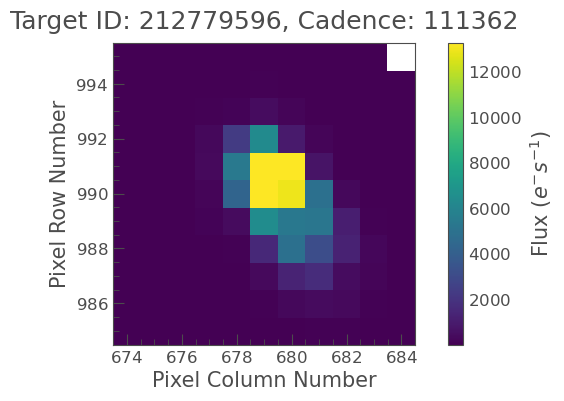

In [54]:
# Notice that when you use download() on multiple curves at once, it will only download the first one. Use
# download_all() for all
tpf.plot()

In [55]:
# And then we can convert this to a lightcurve as shown above

Another cool thing you can do: so far we've only been looking at the "postage-stamp" cutouts that the TESS pipeline generates for each of its targets. But we can also look at full-frame images (FFIs) with lightkurve.search_tesscut(), which launches the tesscut tool. You can basically let it know exactly how big you want your cutout to be (is my understanding).

In [56]:
# Don't forget you can chain multiple commands together like:
# klc = lk.search_lightcurve("Kepler-8", author="Kepler", cadence="long", quarter=4).download()

In [6]:
# You can find out where lightkurve stored a light curve file with klc.filename, where klc is the name of the curve

# I'm not totally sure if this is true for TESSLightCurve objects too, but at least for KeplerLightCurve objects, 
# they contain a "quality" column with info on the data quality at each time measurement

# Seems like the PDCSAP (as opposed to just SAP) flux is the one that's usually useful for detecting planets, but
# since it removes long-term variability (which is probably something I'm interested in) I'm wondering if I should
# use SAP or PDCSAP

Now following along with tutorial "Interactively inspecting target pixel files"; http://docs.lightkurve.org/tutorials/1-getting-started/interactively-inspecting-data.html

In [2]:
tpf = lk.search_targetpixelfile("HL Tau", author='K2', campaign=13, cadence='long').download()

In [3]:
tpf.interact(notebook_url='localhost:5555')

In [4]:
# As you can see, this doesn't work as is, and I ran into the same issue with Daniel's example 0.1 notebook. 
# There's something with Bokeh that you have to do - see if I can figure it out.
# External IP of aparsells-test2: 34.83.56.207
tpf.interact(notebook_url='34.83.56.207:5555')

In [6]:
# Here I'm trying to set the BOKEH_ALLOW_WS_ORIGIN environment variable which 
# https://docs.bokeh.org/en/latest/docs/reference/settings.html seems to say could work - however, it does not.
os.environ["BOKEH_ALLOW_WS_ORIGIN"] = "34.83.56.207:5555"

In [7]:
# Just tried actually setting in my shell the environment variable with 
# "export BOKEH_ALLOW_WS_ORIGIN="34.83.56.207:5555"" but that didn't work. Even restarted Jupyter Notebook but
# no dice
tpf.interact(notebook_url='34.83.56.207:5555')

Just talked to Daniel on Slack about this. It looks like the lk.interact() function just straight-up doesn't work on a VM to the best of his and Ann Marie's knowledge. He guesses it might have something to do with a firewall, so maybe the GCP firewall rules would help, but I guess that's the end of the road for now for using it on a VM. Right now I'm gonna do a quick check in the GCP Firewall Rules and see if there's anything that would obviuosly help but if not I'll put it aside for now. If I ever really need it to work I'll reach out to Matt and see if he can help or just put something in the #interns channel.